<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/Galactic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports Impound Lot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Constants Casino
Mtotal = 1E11
Ttotal = 12E9
Sft = 1E9
TauSun = 10E9

# Constant star formation rate
SFR = Mtotal/Sft

# Time elapsed array
T = np.linspace(0, Ttotal, 12000)
Tl = len(T)

# Mass range array
M = np.linspace(0.5, 25, 100)
dM = M[1] - M[0]
Ml = len(M)

# Time of formation array
Tform = np.arange(0, Sft, 1E7)
dT = Tform[1] - Tform[0]
Tfl = len(Tform)

# Creating arrays for the V magnitude/BV colour data
MagMass = np.array([0.8, 1, 1.25, 2, 3, 5, 9, 15, 25])
Vmag = np.array([6.5, 4.93, 4.2, 1, -0.5, -1.4, -3.7, -4.3, -5.2])
BVmag = np.array([1.02, 0.69, 0.59, 0.1, -0.12, -0.18, -0.3, -0.32, -0.32])

In [3]:
# Functions Fort

# IMF = E0 * M**-2.35 * M
def Mtot(M):
  return (M**(-1.35))

# Number of stars = E0 * M**-2.35 * dM
def Nstar(M):
    return (M**(-2.35)) * E0 * dM

# Main sequence lifetime = TauSun * M**-2.5
def Starlife(M):
  return TauSun * (M**(-2.5))

# Luminosity = M**a
def Lumin(M, a):
  return (M**a)

In [4]:
# Finding how the number of stars evolves over time

# Finding E0 = Mtotal/Mtot
Int = Mtot(M)*dM
E0 = (SFR * dT)/np.sum(Int)
print(E0)

# Finding Number of stars per Mass interval
Stnumb = np.zeros(Ml)
for i in np.arange(0, Ml, 1):
  Stnumb[i] = Nstar(M[i])
'''
# Star death
Lifetime = Starlife(M)/dT
print(Lifetime)
Strbn
'''
# Number of stars per mass range, for any given time
# i = Time
# j = Mass


Numb = np.zeros((Tl, Ml))
MassT = np.zeros(Tl)
Stnum = np.zeros(Tl)

for i in range(Tl):
  if (T[i] >= 1E9):
    AliveCheck = 0
  else:
    AliveCheck = 1
  for j in range(Ml):
    if (T[i] >= Starlife(M[j])):
      if Numb[i-1][j] > 0:
        Nnotstar = Nstar(M[j])
      else:
        Nnotstar = 0
    else:
      Nnotstar = 0
    Numb[i][j] = Numb[i-1][j] + Nstar(M[j]) * AliveCheck - Nnotstar
    if (Numb[i][j] < 0):
      Numb[i][j] = 0
  Stnum[i] = np.sum(Numb[i])
  MassT[i] = np.sum(Numb[i] * M)

print(Numb)

326088255.5343859
[[4.11421077e+08 1.59924210e+08 8.16645574e+07 ... 4.38647221e+04
  4.28410586e+04 4.18511144e+04]
 [8.22842155e+08 3.19848419e+08 1.63329115e+08 ... 8.77294443e+04
  8.56821171e+04 8.37022288e+04]
 [1.23426323e+09 4.79772629e+08 2.44993672e+08 ... 1.31594166e+05
  1.28523176e+05 1.25553343e+05]
 ...
 [4.11421077e+11 1.59924210e+11 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.11421077e+11 1.59924210e+11 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.11421077e+11 1.59924210e+11 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


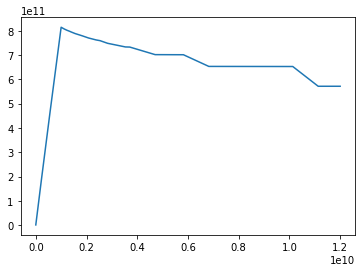

In [5]:
# Number of stars over time
plt.plot(T,Stnum)

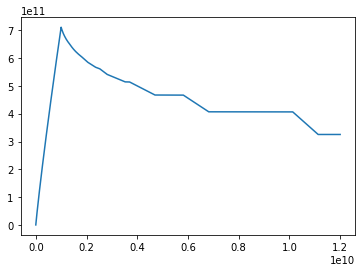

In [6]:
# Mass evolution over time
plt.plot(T,MassT)

[4.75299310e+11 9.50598620e+11 1.42589793e+12 ... 5.01730594e+10
 5.01730594e+10 5.01730594e+10]


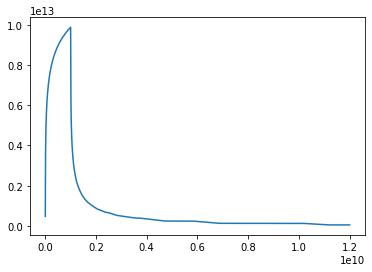

In [7]:
# Finding the Luminosity evolution of the stars
Lumb = np.zeros((Tl, Ml))
LumT = np.zeros(Tl)

for i in range(Tl):
  for j in range(Ml):
    if (M[j] >= 1):
      a = 3.9
    else:
      a = 5
    Lumb[i][j] = Numb[i][j] * Lumin(M[j],a)
  LumT[i] = np.sum(Lumb[i])

# Luminosity evolution over time
plt.plot(T,LumT)
print(LumT)

8.434922553440567 0.2792188760096659 -17.87669803804364


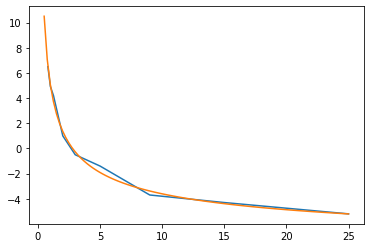

In [8]:
# V magnitude and colour graphs

# Curve fit this to find the colour
def Vmagfit(x, *p):
  return p[0] * np.exp(x**-p[1]) + p[2]

Vmag_guess = np.array([8.435,0.279,-17.877])
Vmagopt, Vmagcov = curve_fit(Vmagfit, MagMass, Vmag, Vmag_guess)

# Plotting Curve-fitted mass against V magnitude graph

plt.plot(MagMass, Vmag)
plt.plot(M, Vmagfit(M, *Vmagopt))

print(Vmagopt[0], Vmagopt[1], Vmagopt[2])

8.779886753933368 0.3194205332347948 -18.08697491649469


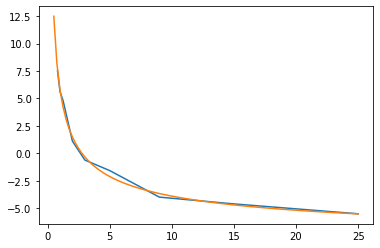

In [9]:
Bmag = BVmag + Vmag

def Bmagfit(x, *p):
  return p[0] * np.exp(x**-p[1]) + p[2]

Bmag_guess = np.array([8.77,0.319,-18.087])
Bmagopt, Bmagcov = curve_fit(Bmagfit, MagMass, Bmag, Bmag_guess)

plt.plot(MagMass, Bmag)
plt.plot(M, Bmagfit(M, *Bmagopt))

print(Bmagopt[0], Bmagopt[1], Bmagopt[2])

In [10]:
'''
LumB = np.zeros((Tl,Ml))
TimeB = np.zeros(Tl)

# Using a for loop to calculate how the flux per star changes with mass and changes through time
for i in range(Tl):
  for j in range(Ml):
    Lumb[j] = Lumin[j] * 10**(0.4 * (Vmagfit(M[j], *Vmagopt) - Bmagfit(M[j], *Bmagopt)))
'''

'\nLumB = np.zeros((Tl,Ml))\nTimeB = np.zeros(Tl)\n\n# Using a for loop to calculate how the flux per star changes with mass and changes through time\nfor i in range(Tl):\n  for j in range(Ml):\n    Lumb[j] = Lumin[j] * 10**(0.4 * (Vmagfit(M[j], *Vmagopt) - Bmagfit(M[j], *Bmagopt)))\n'